**<h1>Image Classification</h1>**

**<h3>Packages</h3>**

In [1]:
import os
import cv2
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import pandas as pd
import seaborn as sn

In [2]:
from tensorflow.python.keras.applications.resnet50 import ResNet50
from tensorflow.python.keras.applications.vgg16 import VGG16
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

c:\Users\User\anaconda3\envs\summer_placement\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\User\anaconda3\envs\summer_placement\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\User\anaconda3\envs\summer_placement\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\User\anaconda3\envs\summer_placeme

**<h3>Loading Images</h3>**

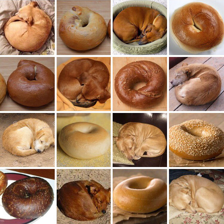

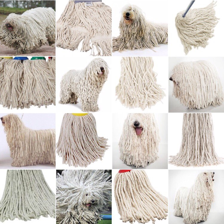

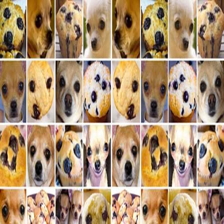

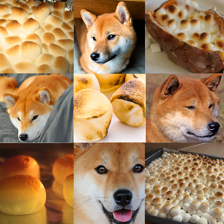

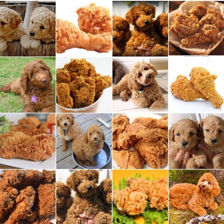

In [3]:
images = {}
all_image_paths = []
for x in os.listdir("images"):
    images[x] = Image.open("images/" + x)
    all_image_paths.append("images/" + x)
    newsize = (224,224)
    display(images[x].resize(newsize))

**<h3>Splitting Image Into Segments</h3>**

In [4]:
def split_img(img, num_rows, num_cols, newsize=(224, 224)):
    # Get the dimensions of the original image
    img_width, img_height = img.size

    # Calculate the width and height of each ROI
    roi_width = img_width // num_cols
    roi_height = img_height // num_rows

    segments = {}

    for i in range(num_rows):
        for j in range(num_cols):
            # Calculate the coordinates for cropping
            left = j * roi_width
            upper = i * roi_height
            right = left + roi_width
            lower = upper + roi_height

            # Crop and resize the ROI
            roi = img.crop((left, upper, right, lower)).resize(newsize)
            segments[i, j] = roi

    return segments

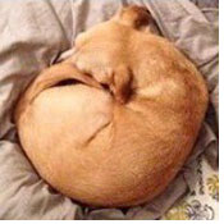

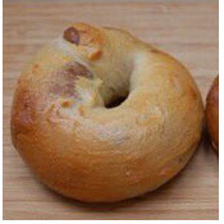

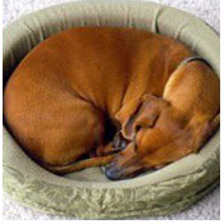

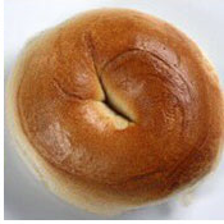

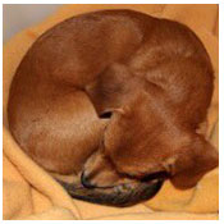

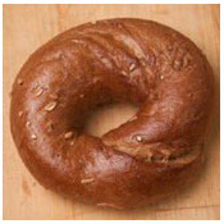

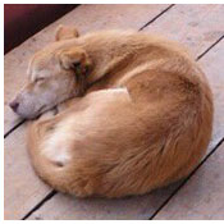

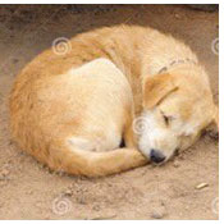

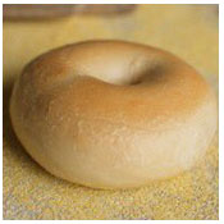

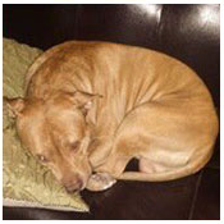

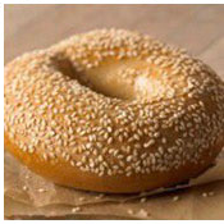

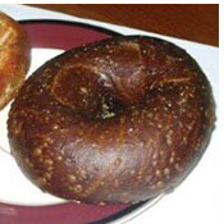

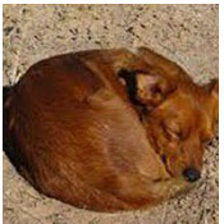

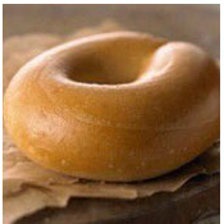

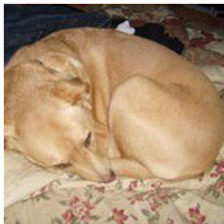

In [5]:
img = images[list(images.keys())[0]]
num_rows = 4
num_cols = 4

segments = split_img(img, num_rows, num_cols)
for segment in segments.values():
    display(segment)

**<h3>Loading Pretrained Weights</h3>**

In [6]:
modelRN50 = ResNet50(weights='imagenet')
modelV16 = VGG16(weights='imagenet')

**<h3>Making Predictions</h3>**

In [7]:
def predict_paths(model, path, target_size):
    predictions = []
    for i in range(len(path)):
        # Loading Image
        img = image.load_img(path[i], target_size=target_size)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        
        prediction = model.predict(x)
        print('Predicted:', decode_predictions(prediction, top=3)[0])
        predictions.append(prediction)
    
    return predictions

In [8]:
def predict_imgs(model, images, target_size):
    predictions = []
    for key, value in images.items():
        x = images[key].resize(target_size)
        x = image.img_to_array(x)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        
        prediction = model.predict(x)
        print('Predicted:', decode_predictions(prediction, top=3)[0])
        predictions.append(prediction)
    
    return predictions

In [9]:
resultRN50 = predict_imgs(modelRN50, segments, (224, 224))

Predicted: [('n13044778', 'earthstar', 0.6244988), ('n07875152', 'potpie', 0.0399671), ('n07684084', 'French_loaf', 0.020928135)]
Predicted: [('n07693725', 'bagel', 0.9964843), ('n07695742', 'pretzel', 0.0011136624), ('n07875152', 'potpie', 0.0005406933)]
Predicted: [('n02090379', 'redbone', 0.44727468), ('n02087394', 'Rhodesian_ridgeback', 0.2741122), ('n02093256', 'Staffordshire_bullterrier', 0.09132155)]
Predicted: [('n07693725', 'bagel', 0.99967635), ('n12768682', 'buckeye', 9.737642e-05), ('n07684084', 'French_loaf', 5.2813393e-05)]
Predicted: [('n07693725', 'bagel', 0.984571), ('n07684084', 'French_loaf', 0.005634715), ('n07695742', 'pretzel', 0.003343996)]
Predicted: [('n02090379', 'redbone', 0.25157067), ('n02087394', 'Rhodesian_ridgeback', 0.11413104), ('n02099712', 'Labrador_retriever', 0.090487264)]
Predicted: [('n07693725', 'bagel', 0.9596352), ('n07695742', 'pretzel', 0.03982223), ('n07684084', 'French_loaf', 0.00010455685)]
Predicted: [('n02099601', 'golden_retriever', 0.

In [10]:
resultV16 = predict_imgs(modelV16, segments, (224, 224))

Predicted: [('n07875152', 'potpie', 0.18010494), ('n07693725', 'bagel', 0.117583424), ('n02085620', 'Chihuahua', 0.07464868)]
Predicted: [('n07693725', 'bagel', 0.9991314), ('n07695742', 'pretzel', 0.00081600744), ('n07860988', 'dough', 2.8388633e-05)]
Predicted: [('n02090379', 'redbone', 0.6855365), ('n02087394', 'Rhodesian_ridgeback', 0.15696374), ('n02088466', 'bloodhound', 0.050939135)]
Predicted: [('n07693725', 'bagel', 0.99832886), ('n07695742', 'pretzel', 0.0013680607), ('n07920052', 'espresso', 7.062986e-05)]
Predicted: [('n07693725', 'bagel', 0.9976712), ('n07695742', 'pretzel', 0.0018663576), ('n07684084', 'French_loaf', 0.0001998617)]
Predicted: [('n02090379', 'redbone', 0.22700238), ('n02100583', 'vizsla', 0.17183362), ('n02087394', 'Rhodesian_ridgeback', 0.12643035)]
Predicted: [('n07693725', 'bagel', 0.8133606), ('n07695742', 'pretzel', 0.18654612), ('n02999410', 'chain', 2.6445818e-05)]
Predicted: [('n02099849', 'Chesapeake_Bay_retriever', 0.19926162), ('n02129165', 'lio

In [11]:
def print_results(image_dict, result):
    images = {}
    i = 0
    for key, image in image_dict.items():
        print("Image {}: ".format(i+1))
        display(image)
        pred = decode_predictions(result[i], top=5)[0]
        print("Image {} 's top 5 predictions are: ".format(i+1))
        for j in range(len(pred)):
            print(str(j+1) + ")", pred[j][1], pred[j][2])
        print(" ")
        i+=1

**<h3>Displaying Results</h3>**

In [12]:
def display_results(image_dict, resultRN50, resultV16):
    count = 0
    for key, image in image_dict.items():
        plt.figure(figsize=(10, 7))
        plt.rcParams['figure.figsize'] = (10, 7) 
        plt.rcParams['axes.titlesize'] = 20
        plt.subplot(1, 2, 1)
        plt.title("ResNet50")
        
        resnet_img = image.copy()
        resnet_pred = decode_predictions(resultRN50[count], top=5)[0]

        # Display the image
        plt.imshow(resnet_img)
        
        # Create a bounding box around the whole image
        ax = plt.gca()
        rect = patches.Rectangle((0, 0), resnet_img.size[1], resnet_img.size[0], linewidth=3, edgecolor='g', facecolor='none')
        ax.add_patch(rect)

        # Add the best prediction text to the image with a green background and white font
        _, best_label, best_score = resnet_pred[0]
        annotation_text = f'{best_label}: {best_score:.2%}'
        plt.annotate(annotation_text, xy=(10, 10), fontsize=16, color='white', backgroundcolor='green')

        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.title("VGG16")
        plt.imshow(image)
        
        # Create a bounding box around the whole image for VGG16
        ax2 = plt.gca()
        rect2 = patches.Rectangle((0, 0), image.size[1], image.size[0], linewidth=3, edgecolor='g', facecolor='none')
        ax2.add_patch(rect2)

        # Add the best prediction text to the VGG16 image with a green background and white font
        vgg_img = image.copy()
        vgg_pred = decode_predictions(resultV16[count], top=5)[0]
        _, best_label_vgg, best_score_vgg = vgg_pred[0]
        annotation_text_vgg = f'{best_label_vgg}: {best_score_vgg:.2%}'
        plt.annotate(annotation_text_vgg, xy=(10, 10), fontsize=16, color='white', backgroundcolor='green')

        plt.axis('off')
        plt.show()
        count += 1

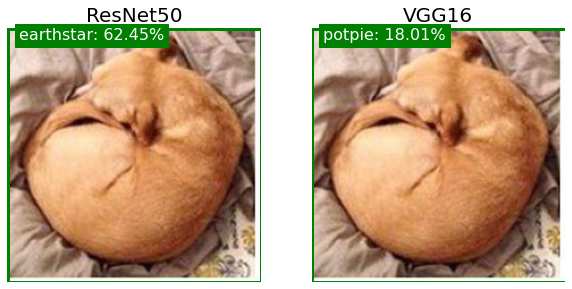

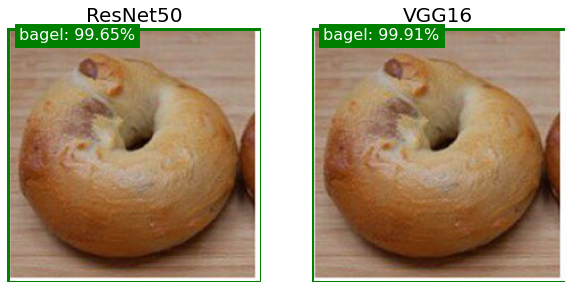

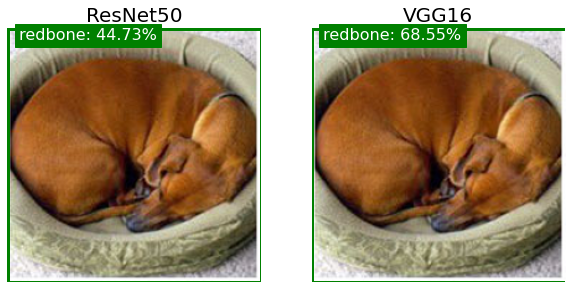

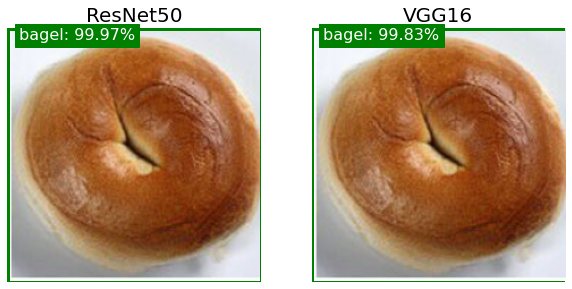

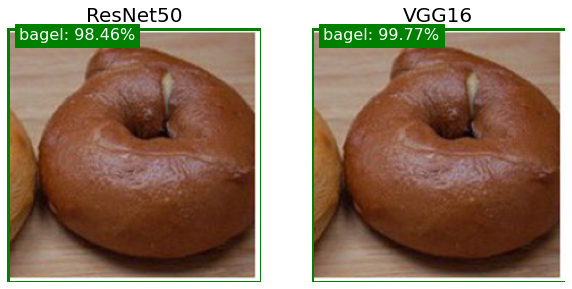

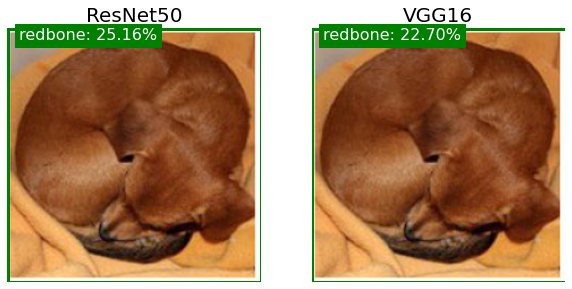

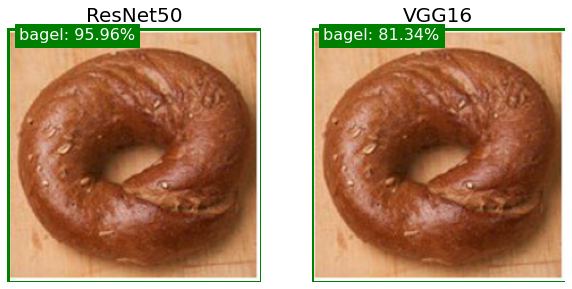

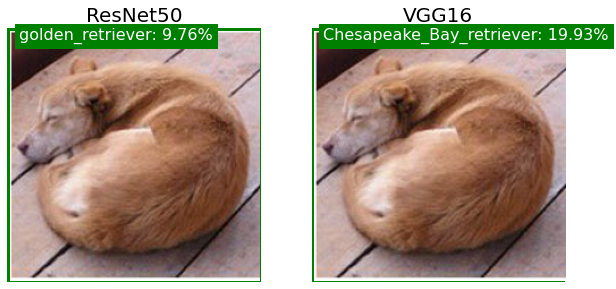

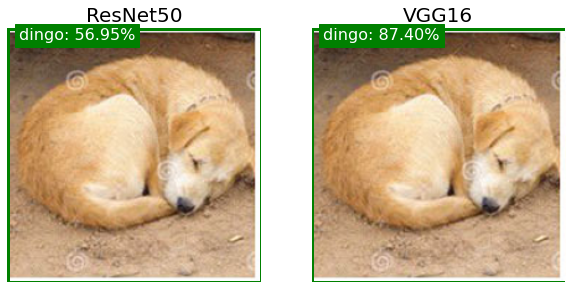

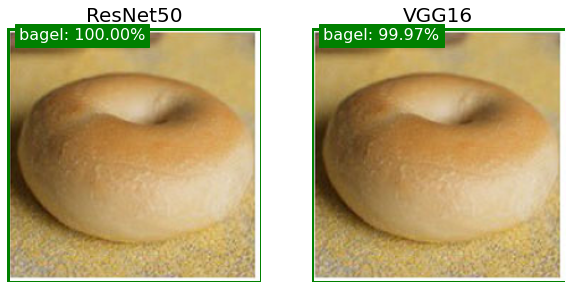

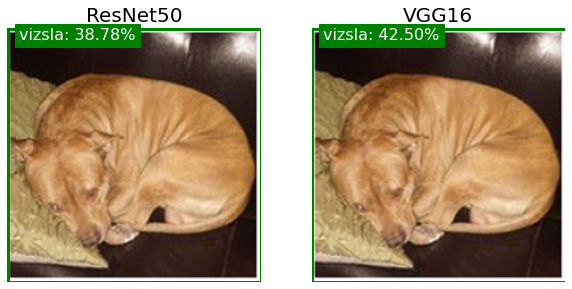

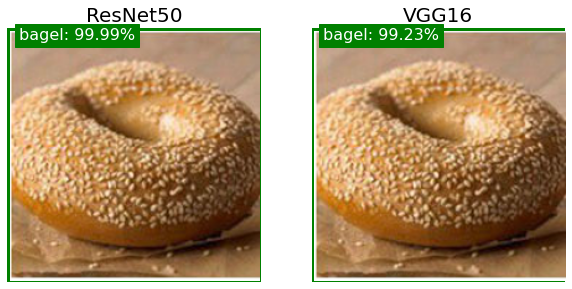

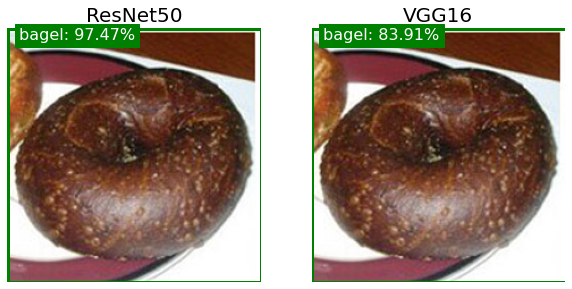

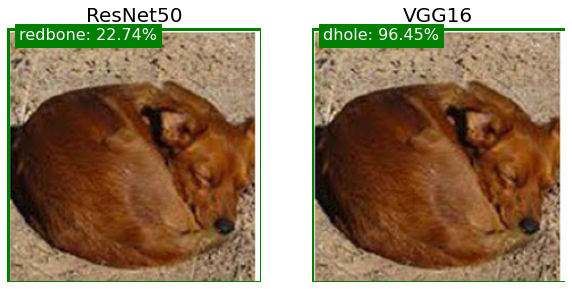

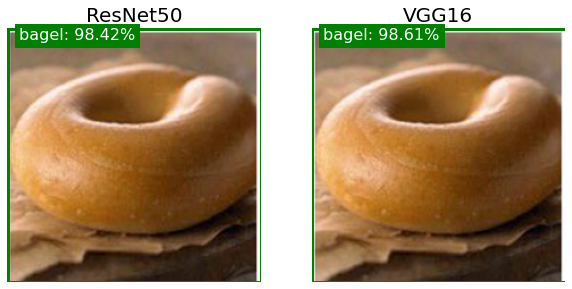

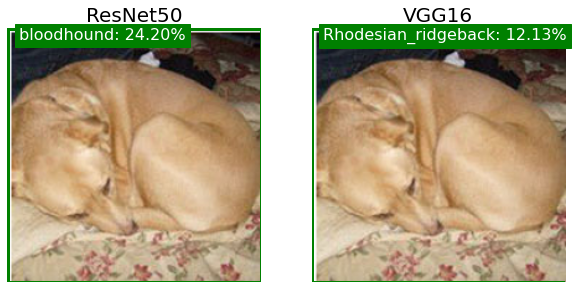

In [13]:
display_results(segments, resultRN50, resultV16)

Image 1: 


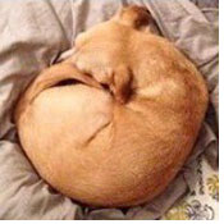

Image 1 's top 5 predictions are: 
1) earthstar 0.6244988
2) potpie 0.0399671
3) French_loaf 0.020928135
4) platypus 0.017853795
5) hog 0.01773273
 
Image 2: 


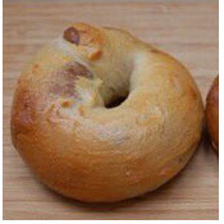

Image 2 's top 5 predictions are: 
1) bagel 0.9964843
2) pretzel 0.0011136624
3) potpie 0.0005406933
4) chambered_nautilus 0.00029155702
5) French_loaf 0.00011578241
 
Image 3: 


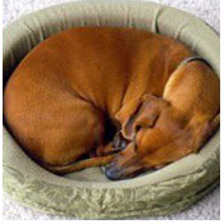

Image 3 's top 5 predictions are: 
1) redbone 0.44727468
2) Rhodesian_ridgeback 0.2741122
3) Staffordshire_bullterrier 0.09132155
4) basenji 0.04437353
5) boxer 0.028437221
 
Image 4: 


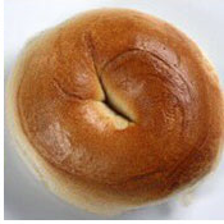

Image 4 's top 5 predictions are: 
1) bagel 0.99967635
2) buckeye 9.737642e-05
3) French_loaf 5.2813393e-05
4) pretzel 3.954439e-05
5) snail 1.6055506e-05
 
Image 5: 


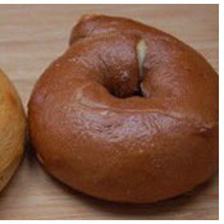

Image 5 's top 5 predictions are: 
1) bagel 0.984571
2) French_loaf 0.005634715
3) pretzel 0.003343996
4) buckeye 0.0007910506
5) bakery 0.000621275
 
Image 6: 


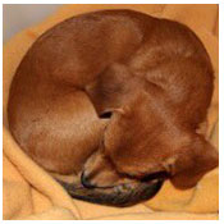

Image 6 's top 5 predictions are: 
1) redbone 0.25157067
2) Rhodesian_ridgeback 0.11413104
3) Labrador_retriever 0.090487264
4) vizsla 0.05970628
5) bloodhound 0.057681173
 
Image 7: 


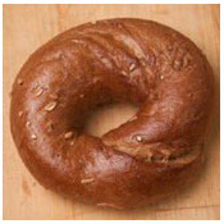

Image 7 's top 5 predictions are: 
1) bagel 0.9596352
2) pretzel 0.03982223
3) French_loaf 0.00010455685
4) buckeye 6.490374e-05
5) nematode 5.8123493e-05
 
Image 8: 


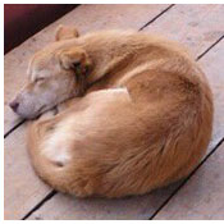

Image 8 's top 5 predictions are: 
1) golden_retriever 0.097623184
2) Saluki 0.096942164
3) dingo 0.074853145
4) kelpie 0.05204728
5) Labrador_retriever 0.047830574
 
Image 9: 


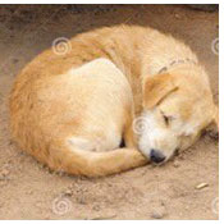

Image 9 's top 5 predictions are: 
1) dingo 0.56947255
2) golden_retriever 0.08637502
3) ice_bear 0.056830257
4) Labrador_retriever 0.03956004
5) lion 0.030606268
 
Image 10: 


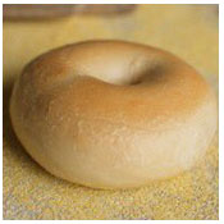

Image 10 's top 5 predictions are: 
1) bagel 0.99997115
2) pretzel 5.337745e-06
3) dough 3.6289275e-06
4) bakery 2.5026384e-06
5) potpie 2.1988947e-06
 
Image 11: 


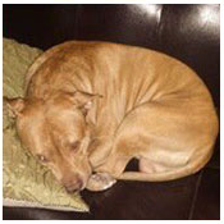

Image 11 's top 5 predictions are: 
1) vizsla 0.3877992
2) bloodhound 0.11500673
3) American_Staffordshire_terrier 0.0844723
4) Rhodesian_ridgeback 0.08249244
5) golden_retriever 0.067945085
 
Image 12: 


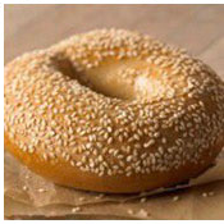

Image 12 's top 5 predictions are: 
1) bagel 0.9998858
2) pretzel 0.00011104529
3) slug 1.3066511e-06
4) snail 5.4449333e-07
5) chambered_nautilus 2.6136513e-07
 
Image 13: 


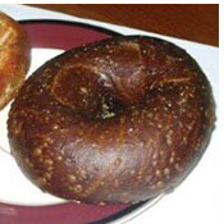

Image 13 's top 5 predictions are: 
1) bagel 0.9746873
2) pretzel 0.018767674
3) French_loaf 0.0029359008
4) chambered_nautilus 0.0005739327
5) Granny_Smith 0.00036384808
 
Image 14: 


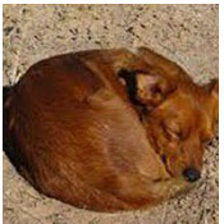

Image 14 's top 5 predictions are: 
1) redbone 0.22736995
2) Irish_setter 0.18076017
3) dhole 0.07802028
4) Irish_terrier 0.06203302
5) Rhodesian_ridgeback 0.035910316
 
Image 15: 


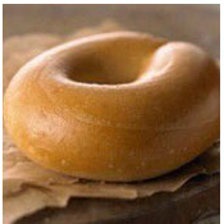

Image 15 's top 5 predictions are: 
1) bagel 0.9841754
2) espresso 0.0042170864
3) potpie 0.0011933532
4) French_loaf 0.0011274966
5) snail 0.0011071096
 
Image 16: 


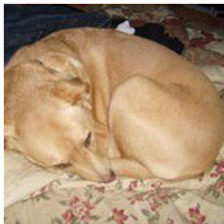

Image 16 's top 5 predictions are: 
1) bloodhound 0.24204461
2) Rhodesian_ridgeback 0.22967608
3) Labrador_retriever 0.08439945
4) Great_Dane 0.059447818
5) American_Staffordshire_terrier 0.05848794
 


In [14]:
print_results(segments, resultRN50)

Image 1: 


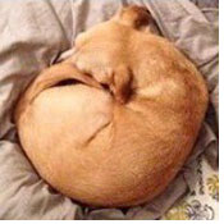

Image 1 's top 5 predictions are: 
1) potpie 0.18010494
2) bagel 0.117583424
3) Chihuahua 0.07464868
4) hog 0.07384714
5) redbone 0.03659963
 
Image 2: 


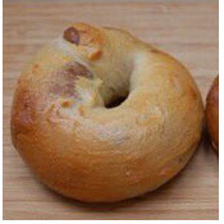

Image 2 's top 5 predictions are: 
1) bagel 0.9991314
2) pretzel 0.00081600744
3) dough 2.8388633e-05
4) butternut_squash 5.6942763e-06
5) French_loaf 5.2165933e-06
 
Image 3: 


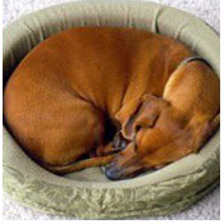

Image 3 's top 5 predictions are: 
1) redbone 0.6855365
2) Rhodesian_ridgeback 0.15696374
3) bloodhound 0.050939135
4) vizsla 0.03612108
5) bagel 0.008640451
 
Image 4: 


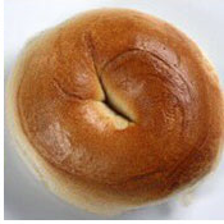

Image 4 's top 5 predictions are: 
1) bagel 0.99832886
2) pretzel 0.0013680607
3) espresso 7.062986e-05
4) French_loaf 5.080219e-05
5) orange 3.014308e-05
 
Image 5: 


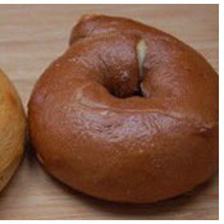

Image 5 's top 5 predictions are: 
1) bagel 0.9976712
2) pretzel 0.0018663576
3) French_loaf 0.0001998617
4) bakery 0.00016530337
5) dough 6.483666e-05
 
Image 6: 


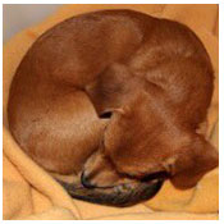

Image 6 's top 5 predictions are: 
1) redbone 0.22700238
2) vizsla 0.17183362
3) Rhodesian_ridgeback 0.12643035
4) bloodhound 0.08350218
5) bull_mastiff 0.0473297
 
Image 7: 


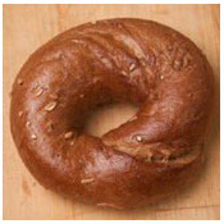

Image 7 's top 5 predictions are: 
1) bagel 0.8133606
2) pretzel 0.18654612
3) chain 2.6445818e-05
4) bakery 1.27480325e-05
5) slug 1.0233841e-05
 
Image 8: 


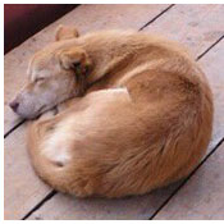

Image 8 's top 5 predictions are: 
1) Chesapeake_Bay_retriever 0.19926162
2) lion 0.19641684
3) golden_retriever 0.13500407
4) Labrador_retriever 0.10370319
5) dingo 0.091687225
 
Image 9: 


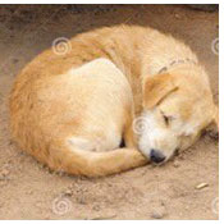

Image 9 's top 5 predictions are: 
1) dingo 0.8739873
2) golden_retriever 0.050669193
3) Labrador_retriever 0.015844334
4) ice_bear 0.015462502
5) bagel 0.010519662
 
Image 10: 


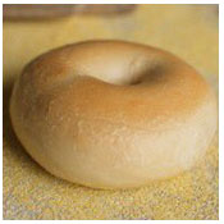

Image 10 's top 5 predictions are: 
1) bagel 0.99967456
2) pretzel 0.00011650321
3) dough 0.00011613647
4) tick 1.2833582e-05
5) Granny_Smith 1.1172021e-05
 
Image 11: 


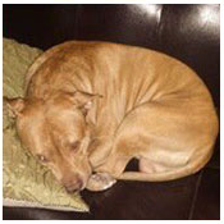

Image 11 's top 5 predictions are: 
1) vizsla 0.4249701
2) Chesapeake_Bay_retriever 0.2755364
3) bloodhound 0.09289794
4) golden_retriever 0.049759217
5) Labrador_retriever 0.036052868
 
Image 12: 


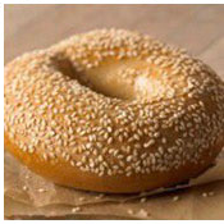

Image 12 's top 5 predictions are: 
1) bagel 0.992295
2) pretzel 0.0076401164
3) bakery 4.39578e-05
4) French_loaf 1.4243393e-05
5) slug 1.5897846e-06
 
Image 13: 


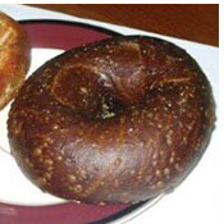

Image 13 's top 5 predictions are: 
1) bagel 0.8391488
2) pretzel 0.14522737
3) French_loaf 0.009183985
4) bakery 0.0022370908
5) chambered_nautilus 0.0016214143
 
Image 14: 


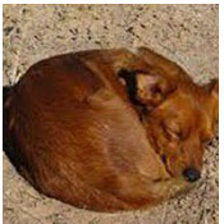

Image 14 's top 5 predictions are: 
1) dhole 0.9644595
2) redbone 0.012719917
3) dingo 0.008822223
4) Rhodesian_ridgeback 0.0015789567
5) Irish_setter 0.0012923375
 
Image 15: 


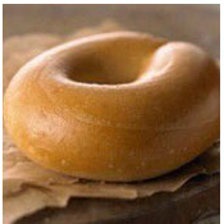

Image 15 's top 5 predictions are: 
1) bagel 0.98614615
2) buckeye 0.004509342
3) mortar 0.0019845334
4) pretzel 0.0009602326
5) bakery 0.000659714
 
Image 16: 


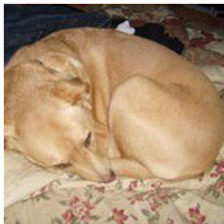

Image 16 's top 5 predictions are: 
1) Rhodesian_ridgeback 0.12125677
2) Labrador_retriever 0.11885215
3) bloodhound 0.10017569
4) redbone 0.082547314
5) dingo 0.056294475
 


In [15]:
print_results(segments, resultV16)